In [1]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
# import ecoscape_connectivity
from scgt import Tile, GeoTiff
import numpy as np
import torch
import rasterio

In [54]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

optimizer = restorationOptimizer(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
# optimizer.randomize_transmission_dict()
transmission_d = optimizer.permeability_dict
print(transmission_d)

{0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036496350365, 201: 0.03351824817518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.09874452554744526, 308: 1.0, 400: 0.0, 401: 0.0018686131386861315, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.0016934306569343065, 502: 0.0001751824817518248, 505: 0.04525547445255475, 506: 0.0012846715328467154, 507: 0.0, 510: 0.0, 511: 0.0012262773722627738, 513: 0.0008175182481751825, 514: 0.0, 515: 0.0, 600: 0.0007007299270072992, 801: 0.0008175182481751825, 802: 0.0003503649635036496, 803: 0.0005839416058394161, 900: 0.01454014598540146, 909: 0.006014598540145986, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.0009343065693430657, 1206: 0.0, 1401: 0.2715912408759124, 1402: 1.0, 1403: 0.9091386861313868, 1405: 0.0}


In [49]:
with GeoTiff.from_file(optimizer.terrain_fn) as terrain_geotiff:
    raw_terrain = terrain_geotiff.get_all_as_tile().m
    terrain_codes = np.unique(raw_terrain)
    for i in terrain_codes:
        if i not in optimizer.permeability_dict.keys() or optimizer.permeability_dict[i] == 0.0:
            optimizer.permeability_dict[i] = np.random.random()/2
            print(i)
print(optimizer.permeability_dict)

{0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036496350365, 201: 0.03351824817518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.09874452554744526, 308: 1.0, 400: 0.0, 401: 0.0018686131386861315, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.0016934306569343065, 502: 0.0001751824817518248, 505: 0.04525547445255475, 506: 0.0012846715328467154, 507: 0.0, 510: 0.0, 511: 0.0012262773722627738, 513: 0.0008175182481751825, 514: 0.0, 515: 0.0, 600: 0.0007007299270072992, 801: 0.0008175182481751825, 802: 0.0003503649635036496, 803: 0.0005839416058394161, 900: 0.01454014598540146, 909: 0.006014598540145986, 1101: 0.02377929197256553, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.0009343065693430657, 1206: 0.0, 1401: 0.2715912408759124, 1402: 1.0, 1403: 0.9091386861313868, 1405: 0.030684276318666808}


In [55]:
# compute connectivity - not needed unless output is needed
repopulation.compute_connectivity(HABITAT_PATH, TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, transmission_d, single_tile=True)
pre_restoration_conn = optimizer.sum_of_tif(CONNECTIVITY_PATH)

death_tif = optimizer.get_death_layer(optimizer.death_fn)
highest_death_rand_2 = optimizer.get_highest_death_pixels(death_tif, 5)

print(f'Pre-restoration sum of connectivity {pre_restoration_conn}')

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Pre-restoration sum of connectivity 3372599


{(152, 158): 36, (51, 128): 36, (40, 126): 36, (63, 129): 36, (18, 122): 36}


<Figure size 500x500 with 0 Axes>

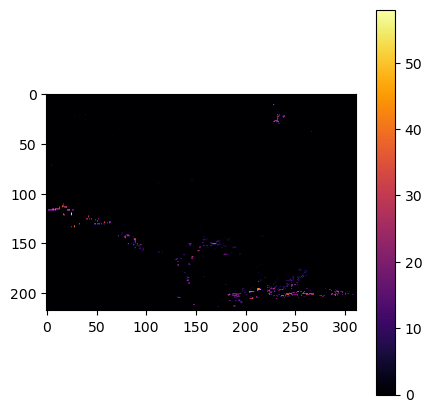

In [51]:
print(highest_death_rand_2)
death_tif.draw_geotiff()

{(236, 203): 37, (212, 198): 36, (147, 164): 36, (170, 148): 36, (6, 116): 36}


<Figure size 500x500 with 0 Axes>

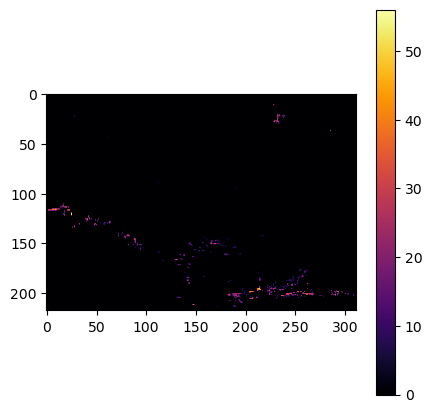

In [46]:
print(highest_death_rand_20)
death_tif.draw_geotiff()

In [56]:
# restore terrain
optimizer.restore_pixels()
# compute connectivity w/ restored terrain
repopulation.compute_connectivity(HABITAT_PATH, RESTORED_TERRAIN_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, transmission_d, single_tile=True)
post_restoration_conn = optimizer.sum_of_tif(RESTORED_CONNECTIVITY_PATH)
print(f'Post-restoration sum of connectivity {post_restoration_conn}')

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Post-restoration sum of connectivity 3383880


Compare new (post-restoration) connectivity to old connectivity
    - Use same seeds to enforce determinism

In [48]:
# change in connectivity for /20:
delta_conn = int(post_restoration_conn) - int(pre_restoration_conn)
percent_change = delta_conn / pre_restoration_conn

print(f'pre-restoration sum of connectivity {pre_restoration_conn}')
print(f'post-restoration sum of connectivity {post_restoration_conn}')
print(f'change in connectivity: {delta_conn}, or {percent_change.round(7)}%')

pre-restoration sum of connectivity 3380477
post-restoration sum of connectivity 3408027
change in connectivity: 27550, or 0.0081497%


In [53]:
# change in connectivity for /2:
delta_conn = int(post_restoration_conn) - int(pre_restoration_conn)
percent_change = delta_conn / pre_restoration_conn

print(f'pre-restoration sum of connectivity {pre_restoration_conn}')
print(f'post-restoration sum of connectivity {post_restoration_conn}')
print(f'change in connectivity: {delta_conn}, or {percent_change.round(7)}%')

pre-restoration sum of connectivity 3382689
post-restoration sum of connectivity 3377737
change in connectivity: -4952, or -0.0014639%


In [57]:
# change in connectivity for no randomization:
delta_conn = int(post_restoration_conn) - int(pre_restoration_conn)
percent_change = delta_conn / pre_restoration_conn

print(f'pre-restoration sum of connectivity {pre_restoration_conn}')
print(f'post-restoration sum of connectivity {post_restoration_conn}')
print(f'change in connectivity: {delta_conn}, or {percent_change.round(7)}%')

pre-restoration sum of connectivity 3372599
post-restoration sum of connectivity 3383880
change in connectivity: 11281, or 0.0033449%


In [ ]:
death_sum = 0
for i in highest_death.values():
    death_sum += i

print(death_sum)


In [ ]:
# total_delta_connectivity/death_sum
delta_conn/death_sum

Try to compute regional connectivity gain for each restored pixel...

In [ ]:
PRE_TER = os.path.join(DATA_PATH, "smol/pre_ter.tif")
PRE_HAB = os.path.join(DATA_PATH, "smol/pre_hab.tif")
PRE_CONN = os.path.join(DATA_PATH, "smol/pre_conn.tif")
PRE_FLOW = os.path.join(DATA_PATH, "smol/pre_flow.tif")
POST_TER = os.path.join(DATA_PATH, "smol/post_ter.tif")
POST_HAB = os.path.join(DATA_PATH, "smol/post_hab.tif")
POST_CONN = os.path.join(DATA_PATH, "smol/post_conn.tif")
POST_FLOW = os.path.join(DATA_PATH, "smol/post_flow.tif")

In [ ]:
death_tif = optimizer.get_death_layer(optimizer.death_fn)
highest_death = optimizer.get_highest_death_pixels(death_tif, n=50)
print(highest_death)

ter = GeoTiff.from_file(optimizer.terrain_fn)
restored_ter = GeoTiff.from_file(optimizer.restored_terr_fn)
hab = GeoTiff.from_file(optimizer.habitat_fn)

window_sz = 16

total_delta_connectivity = 0
total_percent_change = 0.0

permeabilities = []
deaths = []
change_percents = []

for i, (x, y) in enumerate(highest_death.keys()):
    deaths.append(highest_death[(x, y)])
    lat_max, lon_max = rasterio.transform.xy(ter.dataset.transform, y-window_sz, x-window_sz)
    lat_min, lon_min = rasterio.transform.xy(ter.dataset.transform, y+window_sz, x+window_sz)

    pre_ter = ter.crop_to_new_file(PRE_TER, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # pre_ter.draw_geotiff()
    pre_ter.dataset.close()

    pre_hab = hab.crop_to_new_file(PRE_HAB, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # hab_tile = hab.get_all_as_tile().m.astype(np.float)
    # pre_hab.draw_geotiff()
    pre_hab.dataset.close()

    # seed = torch.randint(1, 1000, (1,))[0]
    # seed = i
    repopulation.compute_connectivity(PRE_HAB, PRE_TER, PRE_CONN, PRE_FLOW, transmission_d, single_tile=True, num_simulations=5000)

    # conn_before = GeoTiff.from_file(PRE_CONN)
    # conn_before_tile = conn_before.get_all_as_tile()
    # conn_before.draw_geotiff()

    pre_conn_sum = optimizer.sum_of_tif(PRE_CONN)

    with GeoTiff.from_file(optimizer.terrain_fn) as terrain_geotiff:
        old_terrain = terrain_geotiff.get_pixel_value(x, y)
        permeabilities.append(optimizer.permeability_dict[old_terrain])

    optimizer.change_terrain(x, y, verbose=True)
    post_ter = restored_ter.crop_to_new_file(POST_TER, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # post_ter.draw_geotiff()
    post_ter.dataset.close()

    repopulation.compute_connectivity(PRE_HAB, POST_TER, POST_CONN, POST_FLOW, transmission_d, single_tile=True, num_simulations=5000)
    # conn_after = GeoTiff.from_file(POST_CONN)
    # conn_after.draw_geotiff()
    # conn_after_tile = conn_after.get_all_as_tile()
    post_conn_sum = optimizer.sum_of_tif(POST_CONN)
    
    # change in connectivity:
    delta_conn = int(post_conn_sum) - int(pre_conn_sum)
    percent_change = delta_conn / pre_conn_sum

    change_percents.append(percent_change)

    total_delta_connectivity += delta_conn
    total_percent_change += percent_change

    # diff_tile = Tile(conn_after_tile.w, conn_after_tile.h, conn_after_tile.b, conn_after_tile.c, conn_after_tile.x, conn_after_tile.y, conn_after_tile.m-conn_before_tile.m)
    # diff_tile.draw_tile()

    print(f'pre-restoration sum of connectivity {pre_conn_sum}')
    print(f'post-restoration sum of connectivity {post_conn_sum}')
    print(f'change in connectivity: {delta_conn}, or {percent_change.round(7)}%')

print(f"total_delta_connectivity: {total_delta_connectivity}")
print(f"Average percent change: {total_percent_change / len(highest_death.keys())}")



In [ ]:
print(deaths)
print(change_percents)
plt.scatter(deaths, change_percents, color="red")
plt.xlabel("Deaths")
plt.ylabel("Change in Connectivity")
plt.show()

In [ ]:
print(np.corrcoef(deaths, change_percents))

In [ ]:
death_sum = 0
for i in highest_death.values():
    death_sum += i

print(death_sum)


total_delta_connectivity/death_sum
6737/1646 = 4.093

About 4x more connectivity units per potential unit

TODO:
- Look at correlation between amount of permiability restored, and % change in connectivity
- visualize difference before -> after

In [ ]:
14649/1646

Compare results to randomly chosen pixels:

In [ ]:
from random import randint

# get n random (x, y) pairs in a range
def gencoordinates(width, height, n):
    seen = set()

    x, y = randint(0, width), randint(0, height)

    while len(seen) < n:
        seen.add((x, y))
        yield (x, y)
        x, y = randint(0, width), randint(0, height)
        while (x, y) in seen:
            x, y = randint(0, width), randint(0, height)

print(death_tif.width)
print(death_tif.height)

coords = gencoordinates(death_tif.width, death_tif.height, 50)
for i in coords:
    print(i)



In [ ]:
coords = gencoordinates(death_tif.width, death_tif.height, 50)

ter = GeoTiff.from_file(optimizer.terrain_fn)
restored_ter = GeoTiff.from_file(optimizer.restored_terr_fn)
hab = GeoTiff.from_file(optimizer.habitat_fn)

window_sz = 16

total_delta_connectivity = 0
total_percent_change = 0.0

permeabilities = []
deaths = []
change_percents = []

for i, (x, y) in enumerate(coords):
    # deaths.append(highest_death[(x, y)])
    lat_max, lon_max = rasterio.transform.xy(ter.dataset.transform, y-window_sz, x-window_sz)
    lat_min, lon_min = rasterio.transform.xy(ter.dataset.transform, y+window_sz, x+window_sz)

    pre_ter = ter.crop_to_new_file(PRE_TER, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # pre_ter.draw_geotiff()
    pre_ter.dataset.close()

    pre_hab = hab.crop_to_new_file(PRE_HAB, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # hab_tile = hab.get_all_as_tile().m.astype(np.float)
    # pre_hab.draw_geotiff()
    pre_hab.dataset.close()

    # seed = torch.randint(1, 1000, (1,))[0]
    # seed = i
    repopulation.compute_connectivity(PRE_HAB, PRE_TER, PRE_CONN, PRE_FLOW, transmission_d, single_tile=True, num_simulations=5000)

    # conn_before = GeoTiff.from_file(PRE_CONN)
    # conn_before_tile = conn_before.get_all_as_tile()
    # conn_before.draw_geotiff()

    pre_conn_sum = optimizer.sum_of_tif(PRE_CONN)

    with GeoTiff.from_file(optimizer.terrain_fn) as terrain_geotiff:
        old_terrain = terrain_geotiff.get_pixel_value(x, y)
        permeabilities.append(optimizer.permeability_dict[old_terrain])

    optimizer.change_terrain(x, y, verbose=True)
    post_ter = restored_ter.crop_to_new_file(POST_TER, [lat_max, lon_min, lat_min, lon_max], padding=0)
    # post_ter.draw_geotiff()
    post_ter.dataset.close()

    repopulation.compute_connectivity(PRE_HAB, POST_TER, POST_CONN, POST_FLOW, transmission_d, single_tile=True, num_simulations=5000)
    # conn_after = GeoTiff.from_file(POST_CONN)
    # conn_after.draw_geotiff()
    # conn_after_tile = conn_after.get_all_as_tile()
    post_conn_sum = optimizer.sum_of_tif(POST_CONN)
    
    # change in connectivity:
    delta_conn = int(post_conn_sum) - int(pre_conn_sum)
    percent_change = delta_conn / pre_conn_sum

    change_percents.append(percent_change)

    total_delta_connectivity += delta_conn
    total_percent_change += percent_change

    # diff_tile = Tile(conn_after_tile.w, conn_after_tile.h, conn_after_tile.b, conn_after_tile.c, conn_after_tile.x, conn_after_tile.y, conn_after_tile.m-conn_before_tile.m)
    # diff_tile.draw_tile()

    print(f'pre-restoration sum of connectivity {pre_conn_sum}')
    print(f'post-restoration sum of connectivity {post_conn_sum}')
    print(f'change in connectivity: {delta_conn}, or {percent_change.round(7)}%')

print(f"total_delta_connectivity: {total_delta_connectivity}")
print(f"Average percent change: {total_percent_change / len(coords)}")



In [ ]:
total_percent_change = 0
for i in change_percents:
    if type(i) == np.float64:
        total_percent_change += i

print(total_percent_change)

print(f"total_delta_connectivity: {total_delta_connectivity}")
print(f"Average percent change: {total_percent_change / 50}")